In [1]:
import numpy as np 

In [4]:
import pandas as pd

In [9]:
df_contacts = pd.read_csv('contacts.tsv', delimiter = "\t")

In [10]:
df_search = pd.read_csv('searches.tsv', delimiter = "\t")

In [11]:
df_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [12]:
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ds                    35737 non-null  object 
 1   id_user               35737 non-null  object 
 2   ds_checkin            23888 non-null  object 
 3   ds_checkout           23888 non-null  object 
 4   n_searches            35737 non-null  int64  
 5   n_nights              23888 non-null  float64
 6   n_guests_min          35737 non-null  int64  
 7   n_guests_max          35737 non-null  int64  
 8   origin_country        35737 non-null  object 
 9   filter_price_min      13322 non-null  float64
 10  filter_price_max      13322 non-null  float64
 11  filter_room_types     16191 non-null  object 
 12  filter_neighborhoods  1346 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


### About the Data: 

searches.tsv: Contains a row for each set of searches that a user does for Dublin. 

contacts.tsv: Contains a row for every time that an assigned visitor makes an inquiry for a stay in a listing in Dublin

### Challenge: 

The City Manager wants to better understand:

1. what guests are looking for the most in Dublin.

2. What kind of inquiries hosts tend to accept the most. 

Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. 

For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
what other data would be useful to have to deepen the analysis and understanding.


### Here is what my understanding of the problem is: Breaking down the problem: 

1. What guests are demanding? 

2. What hosts are supplying?

3. Where is the gap? 





In [14]:
#Lets examine the search dataset: 

df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ds                    35737 non-null  object 
 1   id_user               35737 non-null  object 
 2   ds_checkin            23888 non-null  object 
 3   ds_checkout           23888 non-null  object 
 4   n_searches            35737 non-null  int64  
 5   n_nights              23888 non-null  float64
 6   n_guests_min          35737 non-null  int64  
 7   n_guests_max          35737 non-null  int64  
 8   origin_country        35737 non-null  object 
 9   filter_price_min      13322 non-null  float64
 10  filter_price_max      13322 non-null  float64
 11  filter_room_types     16191 non-null  object 
 12  filter_neighborhoods  1346 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


### Cleaning Framework: 

1. Lets first check for missing values. 


In [15]:
print(df_search.isnull().sum())

ds                          0
id_user                     0
ds_checkin              11849
ds_checkout             11849
n_searches                  0
n_nights                11849
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        22415
filter_price_max        22415
filter_room_types       19546
filter_neighborhoods    34391
dtype: int64


In [16]:
df_search

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaN,NaN,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt,NaN
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaN,NaN,2,NaN,1,1,US,NaN,NaN,NaN,NaN
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt,NaN
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaN,NaN,5,NaN,1,1,IE,0.0,4.850000e+02,NaN,NaN


There are some null values in ds_checkin and ds_checkout dates and also in n_nights - Number of Nights: 

So, These columns are important columns for our analysis, when people want to stay amd also indicates the duration of the stay, we cannot impute these null values, but we can flag them. 

I am not dealing with null values in n_nights columns, letting it be, because we want to work with genuine demands only. 






In [17]:
df_search['is_date_filtered'] = df_search['ds_checkin'].notnull() & df_search['ds_checkout'].notnull()


In [18]:
df_search

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods,is_date_filtered
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,...",NaN,True
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN,NaN,True
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN,False
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN,True
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaN,NaN,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt,NaN,False
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaN,NaN,2,NaN,1,1,US,NaN,NaN,NaN,NaN,False
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt,NaN,True
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaN,NaN,5,NaN,1,1,IE,0.0,4.850000e+02,NaN,NaN,False


In [21]:
df_search['is_price_filtered'] = df_search['filter_price_min'].notnull()
df_search['is_roomtype_filtered'] = df_search['filter_room_types'].notnull()
df_search['is_neighborhood_filtered'] = df_search['filter_neighborhoods'].notnull()

# Optional fills for analysis grouping
df_search['filter_room_types'] = df_search['filter_room_types'].fillna('No Filter')
df_search['filter_neighborhoods'] = df_search['filter_neighborhoods'].fillna('No Filter')

df_search.info()

In [24]:
df_search['ds'] = pd.to_datetime(df_search['ds'], errors='coerce')
df['ds_checkin'] = pd.to_datetime(df['ds_checkin'], errors='coerce')
df['ds_checkout'] = pd.to_datetime(df['ds_checkout'], errors='coerce')

#Now Lets explore the data: 

-> Lets segment and analyse based on different filters applied. (Does behvaiour differs when filter is applied vs when it is not?)





In [27]:
df_search['is_date_filtered'].value_counts(normalize=True)

# Compare number of nights searched
#df_search[df_search['is_date_filtered']]['n_nights'].describe()


is_date_filtered
True     0.668439
False    0.331561
Name: proportion, dtype: float64

In [31]:
#Conditional Summary; 

df_search[df_search['is_date_filtered']]['n_nights'].describe()

#Mean of n_nights , where the is_date_filter == True is 7 and median is 50th percentile then that is 3 nights. 

count    23888.000000
mean         7.672765
std         21.557614
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        399.000000
Name: n_nights, dtype: float64

In [32]:
df_search['is_price_filtered'].value_counts(normalize=True)

is_price_filtered
False    0.627221
True     0.372779
Name: proportion, dtype: float64

In [36]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [40]:
# If price filters used, what are the typical ranges?
df_search[df_search['is_price_filtered']][['filter_price_min', 'filter_price_max']].describe()

#As we can see here even with the price filter on, most of the customers look for the max_price only. And the median of max+price is 139 dollars. 

,filter_price_min,filter_price_max
count,13322.00,13322.00
mean,8.47,90190634.43
std,53.99,297848217.72
min,0.00,9.00
25%,0.00,86.00
50%,0.00,139.00
75%,0.00,301.00
max,1250.00,1073741823.00


Among users who apply a price filter, most cap their maximum price around $139, with 75% of them setting it below $301. This suggests that price-sensitive users tend to look for affordable listings even when using the filter.

The presence of very high maximum values (like over $10M) may reflect bots, edge-case users, or scraping defaults — but they’re rare and do not affect the central tendency.

50% of the users search for the price ranges 86$ - 139$

In [41]:
#Room_type filtered; 

df_search['filter_room_types'].value_counts().head(10)

filter_room_types
No Filter                                                     19546
,Entire home/apt                                               6331
Entire home/apt                                                3667
,Private room                                                  1693
Private room                                                   1147
,Entire home/apt,Entire home/apt,Private room                   415
Entire home/apt,Private room                                    379
,Entire home/apt,Entire home/apt,Private room,Private room      370
,Entire home/apt,Private room                                   365
,Entire home/apt,Private room,Private room                      230
Name: count, dtype: int64

In [43]:
#Filter_room_types looks similar but messy and redundant - If we look closely there are only two types pf filters applied throughout: 

#Entire home/apt or Private Room: 

df_search['filter_room_types_cleaned'] = df_search['filter_room_types'].apply(
    lambda x: [i.strip() for i in str(x).strip(',').split(',')] if x != 'No Filter' else ['No Filter']
)


In [45]:
df_search['filter_room_types_cleaned'] = df_search['filter_room_types_cleaned'].apply(lambda x: list(set(x)))


In [51]:
df_search['searched_private_room'] = df_search['filter_room_types_cleaned'].apply(lambda x: 'Private room' in x)
df_search['searched_entire_home'] = df_search['filter_room_types_cleaned'].apply(lambda x: 'Entire home/apt' in x)
df_search['searched_both'] = df_search['searched_private_room'] & df_search['searched_entire_home']
df_search['no_room_filter'] = df_search['filter_room_types_cleaned'].apply(lambda x: 'No Filter' in x)


#Lets count the percentage of users who searched for: 

1.Private Room

2.Entire Home/Apt

3.Both

4.Neither ( No Filter)

In [52]:
total = len(df_search)

private_pct = (df_search['searched_private_room'].sum() / total) * 100
entire_pct = (df_search['searched_entire_home'].sum() / total) * 100
both_pct = (df_search['searched_both'].sum() / total) * 100
no_filter_pct = (df_search['no_room_filter'].sum() / total) * 100

print(f"🔹 Private Room: {private_pct:.2f}%")
print(f"🔹 Entire Home/Apt: {entire_pct:.2f}%")
print(f"🔹 Both: {both_pct:.2f}%")
print(f"🔹 No Filter: {no_filter_pct:.2f}%")


🔹 Private Room: 16.69%
🔹 Entire Home/Apt: 36.27%
🔹 Both: 8.01%
🔹 No Filter: 54.69%


In [53]:
#Finding Length of the stay varies or not by the type of room filter applied: 

# Only consider rows where n_nights is available
df_filtered = df_search[df_search['n_nights'].notnull()]

# Grouping by room preference and calculating median/mean nights
stay_by_roomtype = pd.DataFrame({
    'mean_nights': [
        df_filtered[df_filtered['searched_private_room']]['n_nights'].mean(),
        df_filtered[df_filtered['searched_entire_home']]['n_nights'].mean(),
        df_filtered[df_filtered['searched_both']]['n_nights'].mean(),
        df_filtered[df_filtered['no_room_filter']]['n_nights'].mean()
    ],
    'median_nights': [
        df_filtered[df_filtered['searched_private_room']]['n_nights'].median(),
        df_filtered[df_filtered['searched_entire_home']]['n_nights'].median(),
        df_filtered[df_filtered['searched_both']]['n_nights'].median(),
        df_filtered[df_filtered['no_room_filter']]['n_nights'].median()
    ]
}, index=['Private Room', 'Entire Home/Apt', 'Both', 'No Filter'])

print(stay_by_roomtype)


                 mean_nights  median_nights
Private Room            9.63           3.00
Entire Home/Apt         7.32           3.00
Both                    8.54           3.00
No Filter               7.22           3.00


Length of stay does not vary meaningfully by room type filter. Room preference seems more tied to travel style or group size than to stay duration.

In [55]:
df_search[df_search['is_neighborhood_filtered']]['filter_neighborhoods'].value_counts().head(10)

#Most frequently filtered neighborhoods. 

filter_neighborhoods
,City Centre                                        719
,City Centre,Old City                                46
,Temple Bar                                          42
City Centre                                          33
,City Centre,Temple Bar                              29
,Ranelagh and Rathmines                              21
,Old City                                            18
,Ballsbridge                                         15
,City Centre,North City Central/O'Connell Street     12
,Docklands                                           11
Name: count, dtype: int64

In [56]:
df_search['neighborhoods_cleaned'] = df_search['filter_neighborhoods'].apply(
    lambda x: [i.strip() for i in str(x).strip(',').split(',')] if pd.notnull(x) else []
)


In [57]:
from collections import Counter

# Flatten all lists into one
all_neighborhoods = df_search['neighborhoods_cleaned'].sum()

# Count frequencies
neighborhood_counts = Counter(all_neighborhoods)

# Convert to DataFrame
import pandas as pd
neighborhood_df = pd.DataFrame.from_dict(neighborhood_counts, orient='index', columns=['count'])
neighborhood_df = neighborhood_df.sort_values(by='count', ascending=False)


In [59]:
neighborhood_df.head(10) #Top 10 neighborhoods

#City Centre dominates search interest, followed by Temple Bar and Old City. These areas should be prioritized for attracting hosts and optimizing supply."

,count
No Filter,34391
City Centre,1164
Temple Bar,193
Old City,156
Docklands,105
Ballsbridge,87
Trinity College,74
Ranelagh and Rathmines,72
North City Central/O'Connell Street,70
Donnybrook,47


In [60]:
#Origin Country: 

#These are the top 10 demand-generating countries.

df_search['origin_country'].value_counts().head(10)


origin_country
IE    6608
US    5811
GB    4832
FR    3444
IT    2333
DE    2170
ES    1759
CA    1085
AU     962
NL     843
Name: count, dtype: int64

In [88]:
def guest_range(n):
    if n <= 2:
        return '1-2'
    elif n <= 4:
        return '3-4'
    elif n <= 6:
        return '5-6'
    else:
        return '7+'

df_search['guest_group'] = df_search['n_guests_max'].apply(guest_range)

# Count and percentage of searches by guest group
search_demand = df_search['guest_group'].value_counts(normalize=True).sort_index() * 100


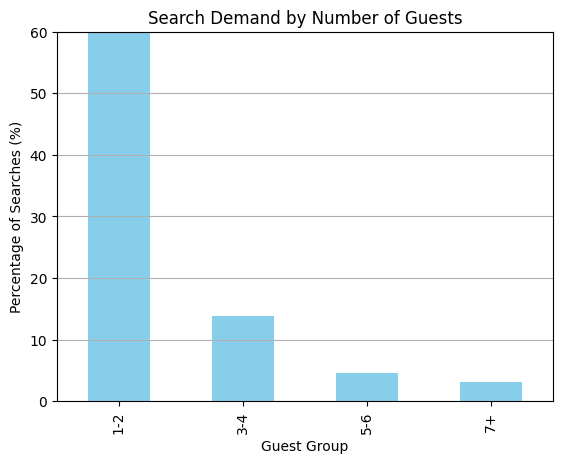

In [89]:
import matplotlib.pyplot as plt

search_demand.plot(kind='bar', color='skyblue')
plt.title('Search Demand by Number of Guests')
plt.xlabel('Guest Group')
plt.ylabel('Percentage of Searches (%)')
plt.ylim(0, 60)
plt.grid(axis='y')
plt.show()


### Temporal Data Analysis: 

In this I am trying to understand this: 

When are people most likely to search for Airbnb in Dublin?

Are there weekday vs weekend trends?

Any monthly or seasonal peaks?

What’s the average booking window (how far in advance they search)?



In [62]:
#Extracting useful data parts: 

df_search['search_dayofweek'] = df_search['ds'].dt.day_name()
df_search['search_month'] = df_search['ds'].dt.month_name()
df_search['search_date'] = df_search['ds'].dt.date  


<Axes: title={'center': 'Searches by Day of Week'}, xlabel='search_dayofweek'>

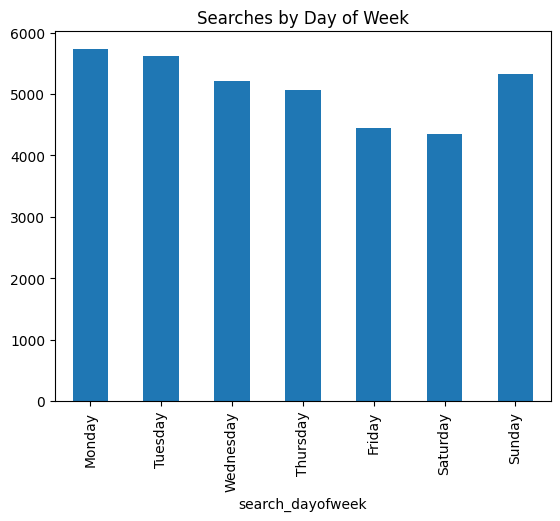

In [63]:
#Search volume by day of the week: 

df_search['search_dayofweek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', title='Searches by Day of Week')


In [67]:
Searches by Day of Week
Monday and Tuesday see the highest search activity, followed by Sunday.

Friday and Saturday are the lowest — possibly because people are traveling or offline on weekends.

Insight:

Users plan trips early in the week. Promotions or pricing nudges might perform better if timed on Mondays or Tuesdays.

SyntaxError: invalid character '—' (U+2014) (1776539824.py, line 4)

df_search['search_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).plot(kind='bar', title='Searches by Month')


<Axes: >

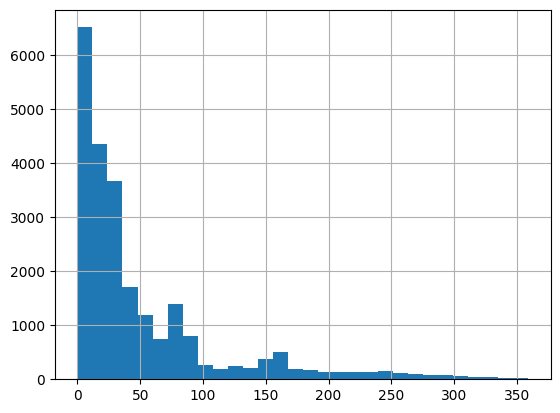

In [66]:
df_search['ds_checkin'] = pd.to_datetime(df_search['ds_checkin'], errors='coerce')
df_search['booking_window'] = (df_search['ds_checkin'] - df_search['ds']).dt.days

# Drop negatives and weird values
df_booking = df_search[df_search['booking_window'].between(0, 365)]

df_booking['booking_window'].hist(bins=30)


 Booking Window Histogram
The majority of users search within 0–50 days of their check-in.

There’s a sharp drop-off after ~60 days.

A small tail extends beyond 150 days — maybe long-stay planners or rare cases.

Insight:

Most users book within a short window (~1–2 months), so hosts should focus on calendar availability for near-future dates.

### 1. Filter Usage Patterns

~45% of users applied room type filters

Most popular: Entire home/apt, followed by Private room

Median stay: ~3 nights across all segments

Price filters used by ~37%, median max price ~$139

### 2. Neighborhood Interest

Only a small fraction (~3.7%) used neighborhood filters

City Centre was by far the most searched neighborhood

Data had redundancies — you successfully cleaned and parsed them

### 3. Origin Country

Top countries: IE, US, GB, FR

Some extreme outliers (DO, BD) in filter_price_max — cleaned with logical caps

US and IE users dominate demand

### 4. Temporal Trends

Most searches occur on Mondays and Tuesdays

Booking window peaks at 0–50 days → most users plan 1–2 months ahead

Dataset limited to October only, so seasonality can’t be inferred

### 5. Date Filter Usage
~66.8% of users applied a date filter when searching

The remaining ~33.2% browsed without specifying check-in/out dates

Implication:

Most users are actively planning their stay, not just browsing casually — important for demand forecasting.

### 6. Price Filter Behavior
Only ~37% of users used a price filter (13322 / 35737)

Among those:

Median max price: $139

75% capped at $301

Extreme outliers: max value up to $1.07 billion – clearly needs filtering

Implication:

Most price-conscious users are looking for listings under $150–$300, even though some bad data skews the mean.
Filtering out unrealistic values is important for accurate insights.



### PART2: Analysis Contacts data: 

Contacts data: Contains a row for every time that an assigned visitor makes an inquiry for a stay in a listing in Dublin.

Here we will analyse: 

1. What are hosts responding to? 

2. What kind of inquires are getting accepted and rejected? 

3. Where does the supply fall short of demand? 




In [68]:
df_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [69]:
df_contacts.head(10)

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14
5,006b68ec-9374-4061-a954-6ae10f838b9e,16a2ccae-60a6-445a-9cc4-8f0d83e454f2,f375e1c9-3d53-4f1f-8727-d8a775ed94ee,2014-10-04 09:15:47.0,2014-10-04 14:42:00.0,NaN,NaN,2014-10-04,2014-10-05,3,6
6,006b68ec-9374-4061-a954-6ae10f838b9e,42bae547-e5d9-4614-8f47-c4ede1036371,9d8e30e9-dcc9-4148-82f7-39f7297b48f9,2014-10-02 00:21:08.0,NaN,NaN,NaN,2014-10-04,2014-10-05,3,4
7,006c93e2-199f-4b35-a094-4176c43034be,ee55912a-88a0-414d-aed7-7f15ce527232,71bca3ca-cbbf-4496-b35b-15dcc39552da,2014-10-02 04:09:28.0,2014-10-02 06:58:38.0,NaN,NaN,2014-11-05,2014-11-07,2,2
8,007a3626-1c7b-44a9-8407-52c0f3f6cf49,d5bf9afd-9572-4f60-955e-02706cc7130a,d8a2dfe9-3bae-4e33-b430-0178b525f070,2014-12-29 18:39:31.0,2014-12-29 23:26:44.0,NaN,NaN,2015-02-13,2015-02-16,2,2
9,007a3626-1c7b-44a9-8407-52c0f3f6cf49,ed4291f5-78e2-4654-9c76-7fdc36af0469,30550df2-1a2c-4969-95cc-2e30e4324b20,2014-12-29 18:44:50.0,2014-12-29 18:51:05.0,2014-12-31 11:53:55.0,2015-01-20 10:03:12.0,2015-02-13,2015-02-16,2,10


In [74]:
### What % of inquiries are responded to, accepted, and booked?

df_contacts['replied'] = df_contacts['ts_reply_at'].notnull()
df_contacts['accepted'] = df_contacts['ts_accepted_at'].notnull()
df_contacts['booked'] = df_contacts['ts_booking_at'].notnull()

conversion_rates = {
    'Inquiries': len(df_contacts),
    'Replied': df_contacts['replied'].sum(),
    'Accepted': df_contacts['accepted'].sum(),
    'Booked': df_contacts['booked'].sum()
}




In [79]:
df_contacts[['replied', 'accepted', 'booked']].mean() * 100

replied    92.28
accepted   46.36
booked     27.79
dtype: float64

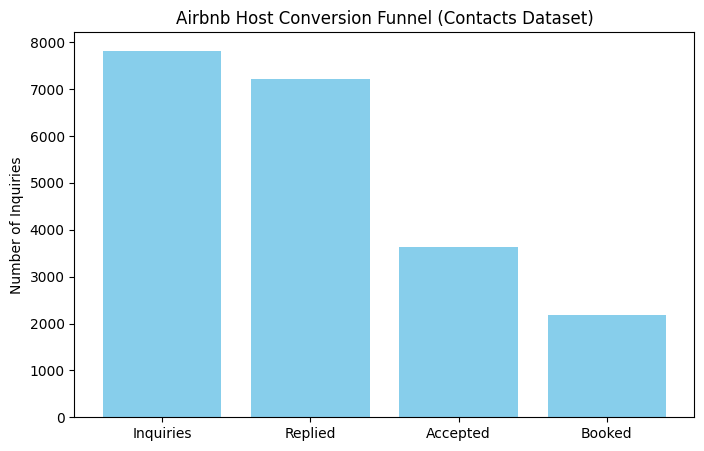

In [75]:
import matplotlib.pyplot as plt

labels = list(conversion_rates.keys())
values = list(conversion_rates.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Airbnb Host Conversion Funnel (Contacts Dataset)')
plt.ylabel('Number of Inquiries')
plt.show()


In [71]:
### How quickly do hosts respond, accept or book? 

#Converting the below features to date_time: 

df_contacts['ts_contact_at'] = pd.to_datetime(df_contacts['ts_contact_at'])
df_contacts['ts_reply_at'] = pd.to_datetime(df_contacts['ts_reply_at'])
df_contacts['ts_accepted_at'] = pd.to_datetime(df_contacts['ts_accepted_at'])

df_contacts['response_time_hours'] = (df_contacts['ts_reply_at'] - df_contacts['ts_contact_at']).dt.total_seconds() / 3600
df_contacts['accept_time_hours'] = (df_contacts['ts_accepted_at'] - df_contacts['ts_contact_at']).dt.total_seconds() / 3600


In [77]:
print("Median response time (hrs):", df_contacts['response_time_hours'].median())
print("Median acceptance time (hrs):", df_contacts['accept_time_hours'].median())


Median response time (hrs): 1.7094444444444445
Median acceptance time (hrs): 1.3933333333333333


In [80]:
df_contacts

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,replied,accepted,booked,response_time_hours,accept_time_hours
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13,True,True,True,0.00,0.00
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10,True,True,True,0.60,0.60
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaN,2014-10-17,2014-10-19,2,3,True,False,False,3.07,NaN
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaN,2014-10-17,2014-10-19,2,2,False,False,False,NaN,NaN
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14,True,True,True,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,ffe366f0-6ab6-4e94-818a-c69c125fed3c,8be6bf94-aeb3-4a51-8ac4-db60baedfea1,7732bad8-e800-49f3-8751-e7604e3fb5a3,2014-10-07 21:43:00,2014-10-08 08:19:33,2014-10-08 08:19:33,NaN,2014-10-17,2014-10-20,2,5,True,True,False,10.61,10.61
7819,ffe366f0-6ab6-4e94-818a-c69c125fed3c,b92639c1-a5a8-48f6-8484-4fe6f62d1c6d,cc3a6bd4-d64f-4cbe-b947-c36c3851b487,2014-10-13 15:38:28,2014-10-13 15:44:56,NaT,NaN,2014-10-17,2014-10-20,2,5,True,False,False,0.11,NaN
7820,ffe366f0-6ab6-4e94-818a-c69c125fed3c,d0b6d89a-4379-43f2-9560-4943df5b8f4f,6e5b4380-66d2-4f2a-8f89-d2794598997d,2014-10-13 15:40:49,2014-10-13 15:42:46,NaT,NaN,2014-10-17,2014-10-20,2,3,True,False,False,0.03,NaN
7821,ffe366f0-6ab6-4e94-818a-c69c125fed3c,f86bc9ab-e199-4254-8609-fd67d6aaed42,28caf371-6d1d-4e06-aaf1-e660966ac7a1,2014-10-07 21:30:31,2014-10-08 19:04:43,NaT,NaN,2014-10-17,2014-10-20,2,2,True,False,False,21.57,NaN


/var/folders/9c/9gm285k54tz9ysvymk9gtd400000gn/T/ipykernel_21875/2169179423.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_contacts['response_time_hours'].dropna(), label='Response Time', shade=True)
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9c/9gm285k54tz9ysvymk9gtd400000gn/T/ipykernel_21875/2169179423.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_contacts['accept_time_hours'].dropna(), label='Acceptance Time', shade=True)
/Users/saiswethalakkoju/anaconda3/lib/python3.11/s

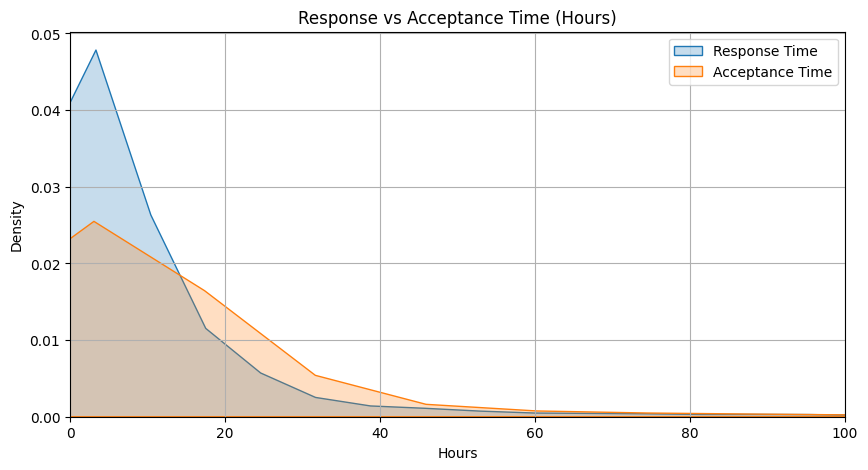

In [81]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(df_contacts['response_time_hours'].dropna(), label='Response Time', shade=True)
sns.kdeplot(df_contacts['accept_time_hours'].dropna(), label='Acceptance Time', shade=True)
plt.title('Response vs Acceptance Time (Hours)')
plt.xlabel('Hours')
plt.ylabel('Density')
plt.xlim(0, 100)
plt.legend()
plt.grid(True)
plt.show()


Hosts respond quickly, with the majority replying within 10 hours of an inquiry. However, acceptance typically follows more slowly, suggesting hosts may need time to review details before committing. Faster acceptance could potentially improve booking rates."

The lag between response and acceptance indicates that while communication is prompt, decision-making may take longer, especially for higher-stakes or longer stays.

### What Influences the acceptance_rate or booking_rate?

Questions I have in my mind: 

Does length of stay matter? Hosts may prefer longer and shorter stay depending on the turnover. 

Does having lesser number of guests has any influence on the acceptance_rate/ booking_rate? Hosts may prefer fewer guests. 

More messages may signal interest or complex needs — could help or hurt.

In [82]:
#Calculating the stay length: 

df_contacts['ds_checkin'] = pd.to_datetime(df_contacts['ds_checkin'])
df_contacts['ds_checkout'] = pd.to_datetime(df_contacts['ds_checkout'])

df_contacts['stay_length'] = (df_contacts['ds_checkout'] - df_contacts['ds_checkin']).dt.days


<Axes: title={'center': 'Acceptance & Booking Rate by Number of Guests'}, xlabel='n_guests'>

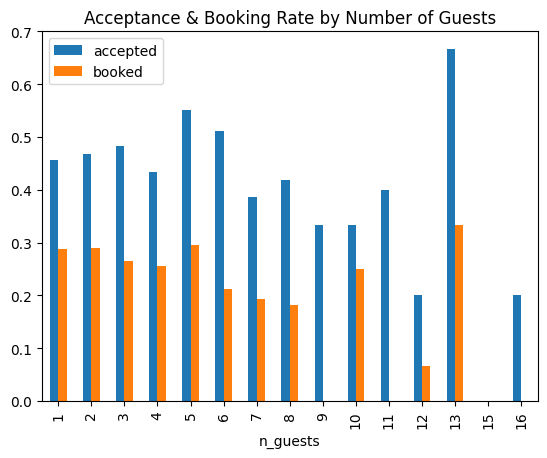

In [83]:
#n_guests vs booking/Acceptance: 

df_contacts.groupby('n_guests')[['accepted', 'booked']].mean().plot(kind='bar', title='Acceptance & Booking Rate by Number of Guests')


<Axes: title={'center': 'Acceptance & Booking Rate by Number of Messages'}, xlabel='n_messages'>

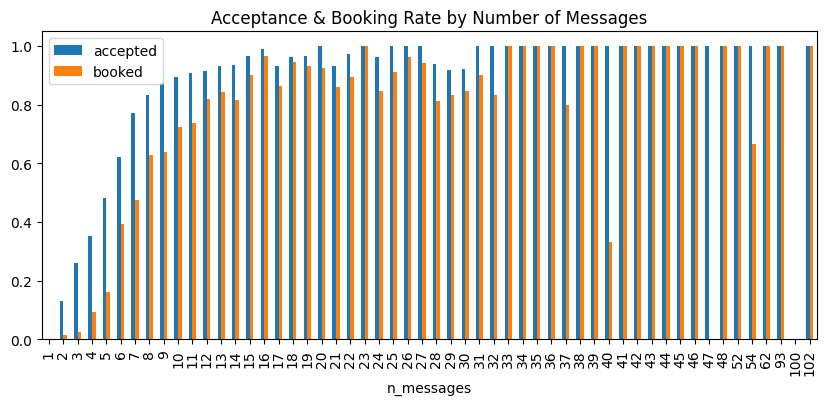

In [84]:
df_contacts.groupby('n_messages')[['accepted', 'booked']].mean().plot(kind='bar', figsize=(10, 4), title='Acceptance & Booking Rate by Number of Messages')


<Axes: title={'center': 'Acceptance & Booking Rate by Length of Stay'}, xlabel='stay_length'>

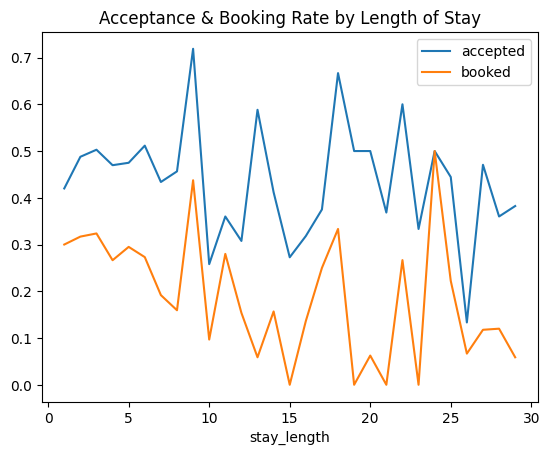

In [85]:
df_contacts[df_contacts['stay_length'] < 30] \
    .groupby('stay_length')[['accepted', 'booked']].mean().plot(kind='line', title='Acceptance & Booking Rate by Length of Stay')


Hosts are more likely to accept and confirm bookings for small to medium-sized groups (1–6 guests). Listings may not be optimized for large groups (10+), or hosts may avoid them due to risk.

There’s a clear upward trend: more messages correlate with higher acceptance and booking rates, stabilizing near 100%.

Hosts prefer stays in the 3–7 day range — likely balancing profitability and availability. Very short or very long stays are less attractive to hosts.

Suggestions: 

Encourage hosts to be more open to small groups and shorter bookings.
Promote communication tools to increase messaging and trust.
Recommend calendar flexibility for high-demand ranges (2–7 nights, <6 guests).

### Gaps: 

Stay Length (A Partial Gap: )

Guests prefer shorter stays (~3 nights), but hosts are more likely to accept longer bookings, leading to friction in short-stay conversion.

Booking_window: 
    
Guests search for trips within the next 1–2 months, but if hosts are not accepting short-notice inquiries, there's a potential mismatch.



Final Recommendations: 
    
### Plugable Gaps:

Mismatch in stay length expectations

Booking timing misalignment (short windows)

Drop-off in acceptance → booking pipeline

### Helpful Additional Data:

Room type & neighborhood on contacts

Full-year search data (not just October)

Price of accepted bookings

Host metadata (experience, responsiveness)